## Homework 10

### Meghan Edgerton

### Math 472

## Question 1 (Non-Coding):

Given that $X \sim Unif(0,1)$, Let $Y = logit(X) = log(\frac{X}{1-X})$

Find the probability density function (PDF) of Y.

Since the PDF of the Unif(0,1) distribution is: $f(x) = \frac{1}{b-a} = 1$, the PDF of $X$ is:

$f_{x}(x) = 1$

It is given that $Y = ln(\frac{X}{1-X})$, so $Y = g(X) = ln(\frac{X}{1-X})$.

$\implies Y = ln(\frac{X}{1-X}) \implies e^{Y} = \frac{X}{1-X}$

$\implies (1-X)e^{Y} = X \implies e^{Y} - Xe^{Y} = X \implies e^{Y} = X + Xe^{Y}$

$\implies X(1+e^{Y}) = e^{Y} \implies g^{-1}(Y) = \frac{e^{Y}}{1+e^{Y}}$

The PDF of Y is then calculated by:

$f_{Y}(Y) = f_{X}(g^{-1}(Y))*|\frac{dg^{-1}(Y)}{dy}|$

$f_{X}(g^{-1}(Y)) = 1$

$|\frac{dg^{-1}(Y)}{dy}| = \frac{e^{Y}}{(1+e^{Y})^{2}}$

Therefore, the PDF of Y is:

$f_{Y}(Y) = \frac{e^{Y}}{(1+e^{Y})^{2}}$.

## Question 2:

(Problem 7.1 on page 230 of Computational Statistics)

The goal of this problem is to investigate the role of the proposal distribution in a Metropolis-Hastings algorithm designed to simulate from the posterior distribution of a parameter $\delta$. In part (a), you are asked to simulate data from a distribution with $\delta$ known. For parts (b)-(d), assume $\delta$ is unknown with a Unif(0,1) prior distribution for $\delta$. For parts (b)-(d), provide an appropriate plot and a table summarizing the output of the algorithm. To facilitate comparisons, use the same number of iterations, random seed, starting values, and burn-in period for all implementations of the algorithm.

(a) Simulate 200 realizations from the mixture distribution in Equation (7.6) with $\delta = 0.7$. Draw a histogram of these data.

(b) Implement an independence chain MCMC procedure to simulate from the posterior distribution of $\delta$, using your data from part (a).

(c) Implement a random walk chain with $\delta^{*} = \delta^{(t)} + \epsilon$ with $\epsilon \sim Unif(-1,1)$.

(d) Reparameterize the problem letting $U = log\{\delta/(1-\delta)\}$ and $U^{*} = u^{(t)}+\epsilon$. Implement a random walk chain in U-space as in Equation (7.8).

(e) Compare the estimates and convergence behavior of the three algorithms.

## 2(a):

Text(0, 0.5, 'Density')

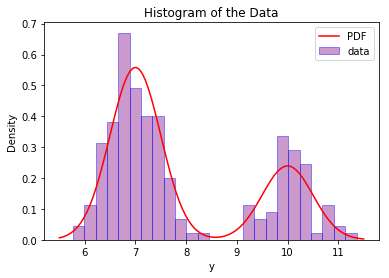

In [7]:
import numpy as np
import scipy.stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

delta = 0.7
n = 200
np.random.seed(96)
n1 = int(n*delta)
y1 = 0.5*np.random.randn(n1) + 7
y2 = 0.5*np.random.randn(n-n1) + 10
y = np.hstack((y1,y2))

# Mixture distribution from Equation 7.6
def mixture(delta,y):
    return delta*norm.pdf(y,7,0.5) + (1-delta)*norm.pdf(y,10,0.5)

# Likelihood function to be used for Metropolis-Hastings Algorithm 
def llike(delta,y):
    return np.prod(mixture(delta,y))

# Density histogram
ax1 = sns.distplot(y,hist=True,kde=False,bins=25,color = 'purple',hist_kws = {'edgecolor':'blue'},norm_hist = True,axlabel = 'y',label = 'data')
ys = np.linspace(5.5,11.5,100)

ax1.plot(ys,mixture(delta,ys),color = 'Red', label = 'PDF')
ax1.legend()
ax1.set_title('Histogram of the Data')
ax1.set_ylabel('Density')

## 2(b):

Text(0.5, 1.0, 'Independence Trace')

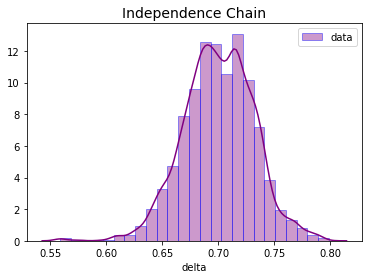

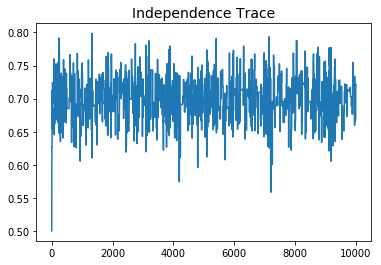

In [2]:
m = 10000
deltavals = np.zeros(m)
delta = 0.5

for i in range(m):
    d = np.random.rand()
    
    # ratio for Metropolis-Hastings Algorithm
    MHr = (llike(d,y))/(llike(delta,y))
    
    r = np.random.rand()
    if r < MHr:
        delta = d
    deltavals[i] = delta
    
# Generating the plots
ax2 = sns.distplot(deltavals[200:], hist =True,kde=True,bins=25,color = 'purple', hist_kws = {'edgecolor': 'blue'},axlabel = 'delta',label='data')
ax2.set_title('Independence Chain',fontsize = 14)
ax2.legend()

plt.figure()
plt.plot(deltavals)
plt.title('Independence Trace', fontsize = 14)

## 2(c):

Text(0.5, 1.0, 'Random Walk Trace')

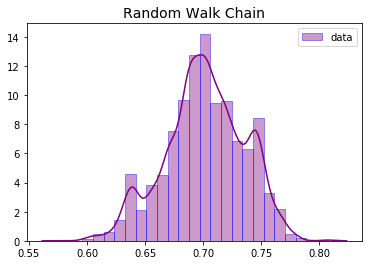

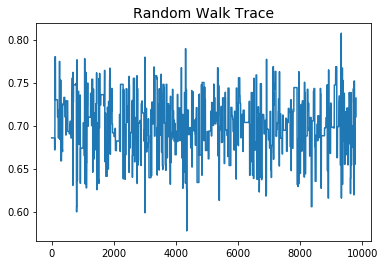

In [3]:
# Random Walk Chain
m = 10000
deltavals2 = np.zeros(m)
delta = 0.5

# Metropolis-Hastings Algorithm
for i in range(m):
    eps = np.random.uniform(-1,1)
    d = delta + eps
    if d < 0 or d > 1:
        MHr = 0
    else:
        MHr = (llike(d,y))/(llike(delta,y))
    r = np.random.rand()
    if r < MHr:
        delta = d
    deltavals2[i] = delta
    
# Generating the plots
ax3 = sns.distplot(deltavals2[200:], hist=True,kde=True,bins=25,color='purple',hist_kws={'edgecolor':'blue'},axlabel='',label='data')
ax3.set_title('Random Walk Chain',fontsize = 14)
ax3.legend()

plt.figure()
plt.plot(deltavals2[200:])
plt.title('Random Walk Trace', fontsize = 14)

## 2(d):

Text(0.5, 1.0, 'U-Space Trace')

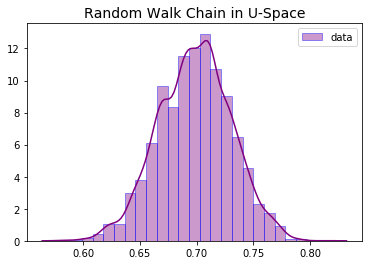

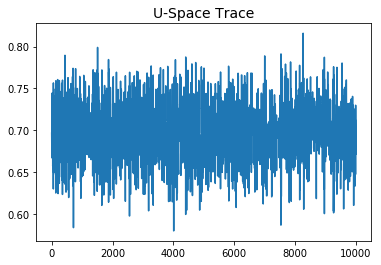

In [4]:
from scipy.special import expit, logit

def mixture2(y,u):
    return expit(u)*norm.pdf(y,7,0.5)+(1-expit(u))*norm.pdf(y,10,0.5)

def llike2(u):
    return np.prod(mixture2(y,u))

m = 10000
uvals = np.zeros(m)
delta = 0.5
u = logit(delta)

# Using the Jacobian in the Metropolis-Hastings Algorithm
for i in range(m):
    eps = np.random.uniform(-1,1)
    U = u + eps
    jacb = np.abs((np.exp(u))/(np.exp(u)+1)**2)
    jacb2 = np.abs((np.exp(U))/(np.exp(U)+1)**2)
    
    MHr = (llike2(U)*jacb2)/(llike2(u)*jacb)
    r = np.random.rand()
    if r < MHr:
        u = U
    uvals[i] = u
    
# Generating the plots
ax4 = sns.distplot(expit(uvals[200:]), hist=True,kde=True,bins=25,color='purple',hist_kws = {'edgecolor':'blue'},axlabel='',label='data')
ax4.set_title('Random Walk Chain in U-Space', fontsize=14)
ax4.legend()

plt.figure()
plt.plot(expit(uvals))
plt.title('U-Space Trace', fontsize=14)

## 2(e):

Based on the results from the three different methods, it seems like the independence chain algorithm and the random walk chain in U-space converge better than the normal random walk chain. The random walk chain trace plot shows a lot less than the other two trace plots, which probably means that many of the values were rejected in the algorithm. Additionally, it seems that the random walk chain in U-space was the most efficient as the histogram looks the most normal.

## Question 3:

(Problem 7.2 on page 231 of Computational Statistics)

Simulating from the mixture distribution in Equation (7.6) is straightforward. However, using the Metropolis-Hastings algorithm to simulate realizations from this distribution is useful for exploring the role of the proposal distribution.

(a) Implement a Metropolis-Hastings algorithm to simulate from Equation (7.6) with $\delta = 0.7$, using $N(x^{(t)},0.01^{2})$ as the proposal distribution. For each of three starting values, $x^{(0)} = 0,7,15$, run the chain for 10,000 iterations. Plot the sample path of the output from each chain. If only one of the sample paths was available, what would you conclude about the chain? For each of the simulations, create a histogram of the realizations with the true density superimposed on the histogram. Based on your output from all three chains, what can you say about the behavior of the chain?

(b) Now change the proposal distribution to improve the convergence properties of the chain. Using the new proposal distribution, repeat part (a).

## 3(a):

Text(0.5, 1.0, 'Trace For Starting Value 15')

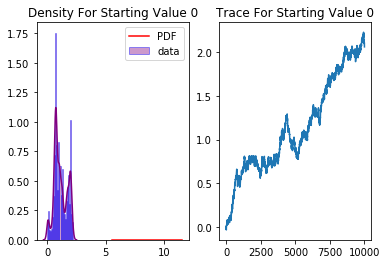

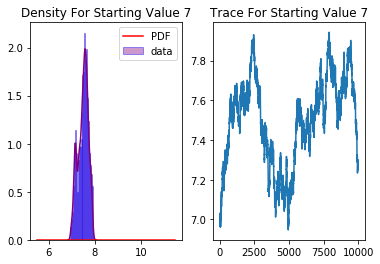

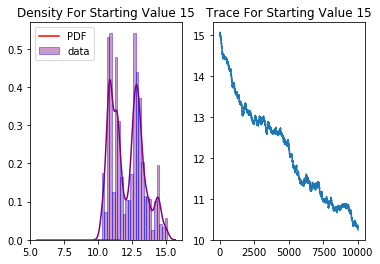

In [5]:
delta = 0.7
m = 10000
np.random.seed(34)

# Starting Values as given from the problem
sv_1 = np.zeros(m)
sv_2 = np.zeros(m)
sv_3 = np.zeros(m)
sv1 = 0
sv2 = 7
sv3 = 15

# Mixture Distribution (Equation 7.6) 
def mixture3(y,delta):
    return delta*norm.pdf(y,7,0.5)+(1-delta)*norm.pdf(y,10,0.5)

# Metropolis-Hastings Algorithm with new proposal distribution
for i in range(m):
    xs1 = norm.rvs(size=1,loc=sv1,scale=0.01)
    xs2 = norm.rvs(size=1,loc=sv2,scale=0.01)
    xs3 = norm.rvs(size=1,loc=sv3,scale=0.01)
    
    r1 = (mixture3(xs1,delta)*norm.rvs(loc=sv1,scale=2.5,size=1))/(mixture3(sv1,delta)*norm.rvs(loc=xs1,scale=0.5,size=1))
    r2 = (mixture3(xs2,delta)*norm.rvs(loc=sv2,scale=2.5,size=1))/(mixture3(sv2,delta)*norm.rvs(loc=xs2,scale=0.5,size=1))
    r3 = (mixture3(xs3,delta)*norm.rvs(loc=sv3,scale=2.5,size=1))/(mixture3(sv3,delta)*norm.rvs(loc=xs3,scale=0.5,size=1))
    
    r = np.random.rand()
    if r < min(r1,1):
        sv1 = xs1
    if r < min(r2,1):
        sv2 = xs2
    if r < min(r3,1):
        sv3 = xs3
    sv_1[i] = sv1
    sv_2[i] = sv2
    sv_3[i] = sv3

    
# Plots for starting value of 0
ys = np.linspace(5.5,11.5,100)
figure, axs = plt.subplots(1,2)
ax5 = sns.distplot(sv_1,hist=True,kde=True,bins=25,color = 'purple', hist_kws={'edgecolor':'blue'}, axlabel='',label='data',ax = axs[0])
ax5.set_title('Density For Starting Value 0')
ax5.plot(ys,mixture(ys,delta), color='red',label='PDF')
ax5.legend()
axs[1].plot(sv_1)
axs[1].set_title('Trace For Starting Value 0')


# Plots for starting value of 7
ys = np.linspace(5.5,11.5,100)
figure, axs = plt.subplots(1,2)
ax6 = sns.distplot(sv_2,hist=True,kde=True,bins=25,color = 'purple', hist_kws={'edgecolor':'blue'}, axlabel='',label='data',ax=axs[0])
ax6.set_title('Density For Starting Value 7')
ax6.plot(ys,mixture(ys,delta), color='red',label='PDF')
ax6.legend()
axs[1].plot(sv_2)
axs[1].set_title('Trace For Starting Value 7')


# Plots for starting value of 15
ys = np.linspace(5.5,11.5,100)
figure, axs = plt.subplots(1,2)
ax7 = sns.distplot(sv_3,hist=True,kde=True,bins=25,color = 'purple', hist_kws={'edgecolor':'blue'}, axlabel='',label='data',ax=axs[0])
ax7.set_title('Density For Starting Value 15')
ax7.plot(ys,mixture(ys,delta), color='red',label='PDF')
ax7.legend()
axs[1].plot(sv_3)
axs[1].set_title('Trace For Starting Value 15')

It seems from the results that changing the starting value in the algorithm changes the location of the spread on the density plots, as well as the behavior of the trace plots. The trace plot increases for a starting value of 0, increases and decreases for the starting value of 7, and then decreases for a starting value of 15. 

## 3(b):

Text(0.5, 1.0, 'Trace For Starting Value 15')

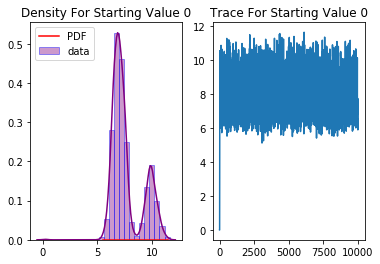

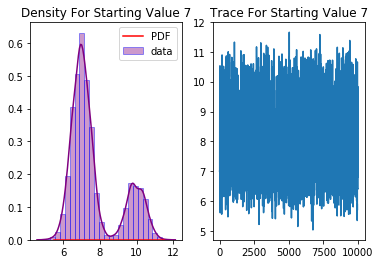

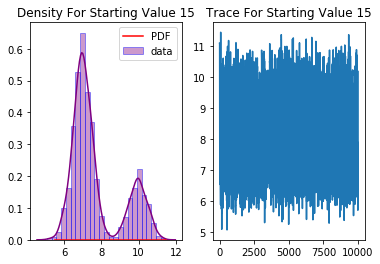

In [6]:
m = 10000

# Starting Values
sv_1 = np.zeros(m)
sv_2 = np.zeros(m)
sv_3 = np.zeros(m)
sv1 = 0
sv2 = 7
sv3 = 15
sigma = 2.5
sigma2 = 2
mu = 7
delta = 0.7

def mixture4(y,delta):
    return delta*norm.pdf(y,7,0.5)+(1-delta)*norm.pdf(y,10,0.5)

for i in range(m):
    xs1 = norm.rvs(size=1,loc=sv1,scale=sigma2)
    xs2 = norm.rvs(size=1,loc=sv2,scale=sigma2)
    xs3 = norm.rvs(size=1,loc=sv3,scale=sigma2)
    
    r1 = (mixture3(xs1,delta)*norm.rvs(loc=sv1,scale=2.5,size=1))/(mixture3(sv1,delta)*norm.rvs(loc=xs1,scale=0.5,size=1))
    r2 = (mixture3(xs2,delta)*norm.rvs(loc=sv2,scale=2.5,size=1))/(mixture3(sv2,delta)*norm.rvs(loc=xs2,scale=0.5,size=1))
    r3 = (mixture3(xs3,delta)*norm.rvs(loc=sv3,scale=2.5,size=1))/(mixture3(sv3,delta)*norm.rvs(loc=xs3,scale=0.5,size=1))
    
    r = np.random.rand()
    if r < min(r1,1):
        sv1 = xs1
    if r < min(r2,1):
        sv2 = xs2
    if r < min(r3,1):
        sv3 = xs3
    sv_1[i] = sv1
    sv_2[i] = sv2
    sv_3[i] = sv3
    

# Plots for starting value of 0
ys = np.linspace(5.5,11.5,100)
figure, axs = plt.subplots(1,2)
ax5 = sns.distplot(sv_1,hist=True,kde=True,bins=25,color = 'purple', hist_kws={'edgecolor':'blue'}, axlabel='',label='data',ax = axs[0])
ax5.set_title('Density For Starting Value 0')
ax5.plot(ys,mixture(ys,delta), color='red',label='PDF')
ax5.legend()
axs[1].plot(sv_1)
axs[1].set_title('Trace For Starting Value 0')


# Plots for starting value of 7
ys = np.linspace(5.5,11.5,100)
figure, axs = plt.subplots(1,2)
ax6 = sns.distplot(sv_2,hist=True,kde=True,bins=25,color = 'purple', hist_kws={'edgecolor':'blue'}, axlabel='',label='data',ax=axs[0])
ax6.set_title('Density For Starting Value 7')
ax6.plot(ys,mixture(ys,delta), color='red',label='PDF')
ax6.legend()
axs[1].plot(sv_2)
axs[1].set_title('Trace For Starting Value 7')


# Plots for starting value of 15
ys = np.linspace(5.5,11.5,100)
figure, axs = plt.subplots(1,2)
ax7 = sns.distplot(sv_3,hist=True,kde=True,bins=25,color = 'purple', hist_kws={'edgecolor':'blue'}, axlabel='',label='data',ax=axs[0])
ax7.set_title('Density For Starting Value 15')
ax7.plot(ys,mixture(ys,delta), color='red',label='PDF')
ax7.legend()
axs[1].plot(sv_3)
axs[1].set_title('Trace For Starting Value 15')

Based on the results shown in the plots, it is obvious that changing the proposal distribution improved the convergence properties of the chain significantly. The density histograms and trace plots generated from using the new proposal distribution are much more consistent and fitting to the true PDF. 